# Segunda Avaliação da disciplina de Inteligência Artificial

# 0) Introdução
	Os dados foram obtidos do dataset CDC Diabetes Health Indicators, proveniente do UCI. Este contém informações de pesquisa sobre as pessoas envolvidas em conjunto com dados diagnósticos de diabetes. O dataset contém 21 features, cada uma sem ausência de dados, sobre testes de laboratório para diabetes e alguns dados de censo sobre cada paciente. A variável de target busca identificar se o paciente é diabético/pré diabético (1) ou não (0).
    
## 0.1) Outras informações do dataset
&emsp;&emsp;Para maiores informações, [página do dataset no UCI](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)

## 0.2) Objetivos do trabalho
	1. Implementar em Python códigos para Árvores de Decisão, Random Forest e Rede Neural Multilayer Perceptron
	2. Para cada algoritmo, listar as taxas de acurácia e F1 obtidas para cada conjunto de parâmetros
	3. Explicar a divisão do conjunto de dados para treinamento e teste
	4. Avaliar a performance dos algoritmos do ponto de vista da métrica e da explicabilidade desses algoritmos
	5. Análise crítica de escolher e colocar um modelo em produção para o domínio do dataset selecionado

## 0.3) Algumas bibliotecas utilizadas
	. Pandas: visualização e manipulação de dados
	. Scikit Learn: principais métodos utilizados no trabalho (Decision Tree, Random Forest, Multilayer Perceptron,...)
	. Seaborn: visualização das matrizes de correlação e confusão
	. ucimlrepo: obtenção dos dados do dataset
	. Matplotlib: usado em conjunto com seaborn para visualização de dados
	. Graphviz: visualização das árvores de decisão

## 0.4) Tabela com os parâmetros do dataset

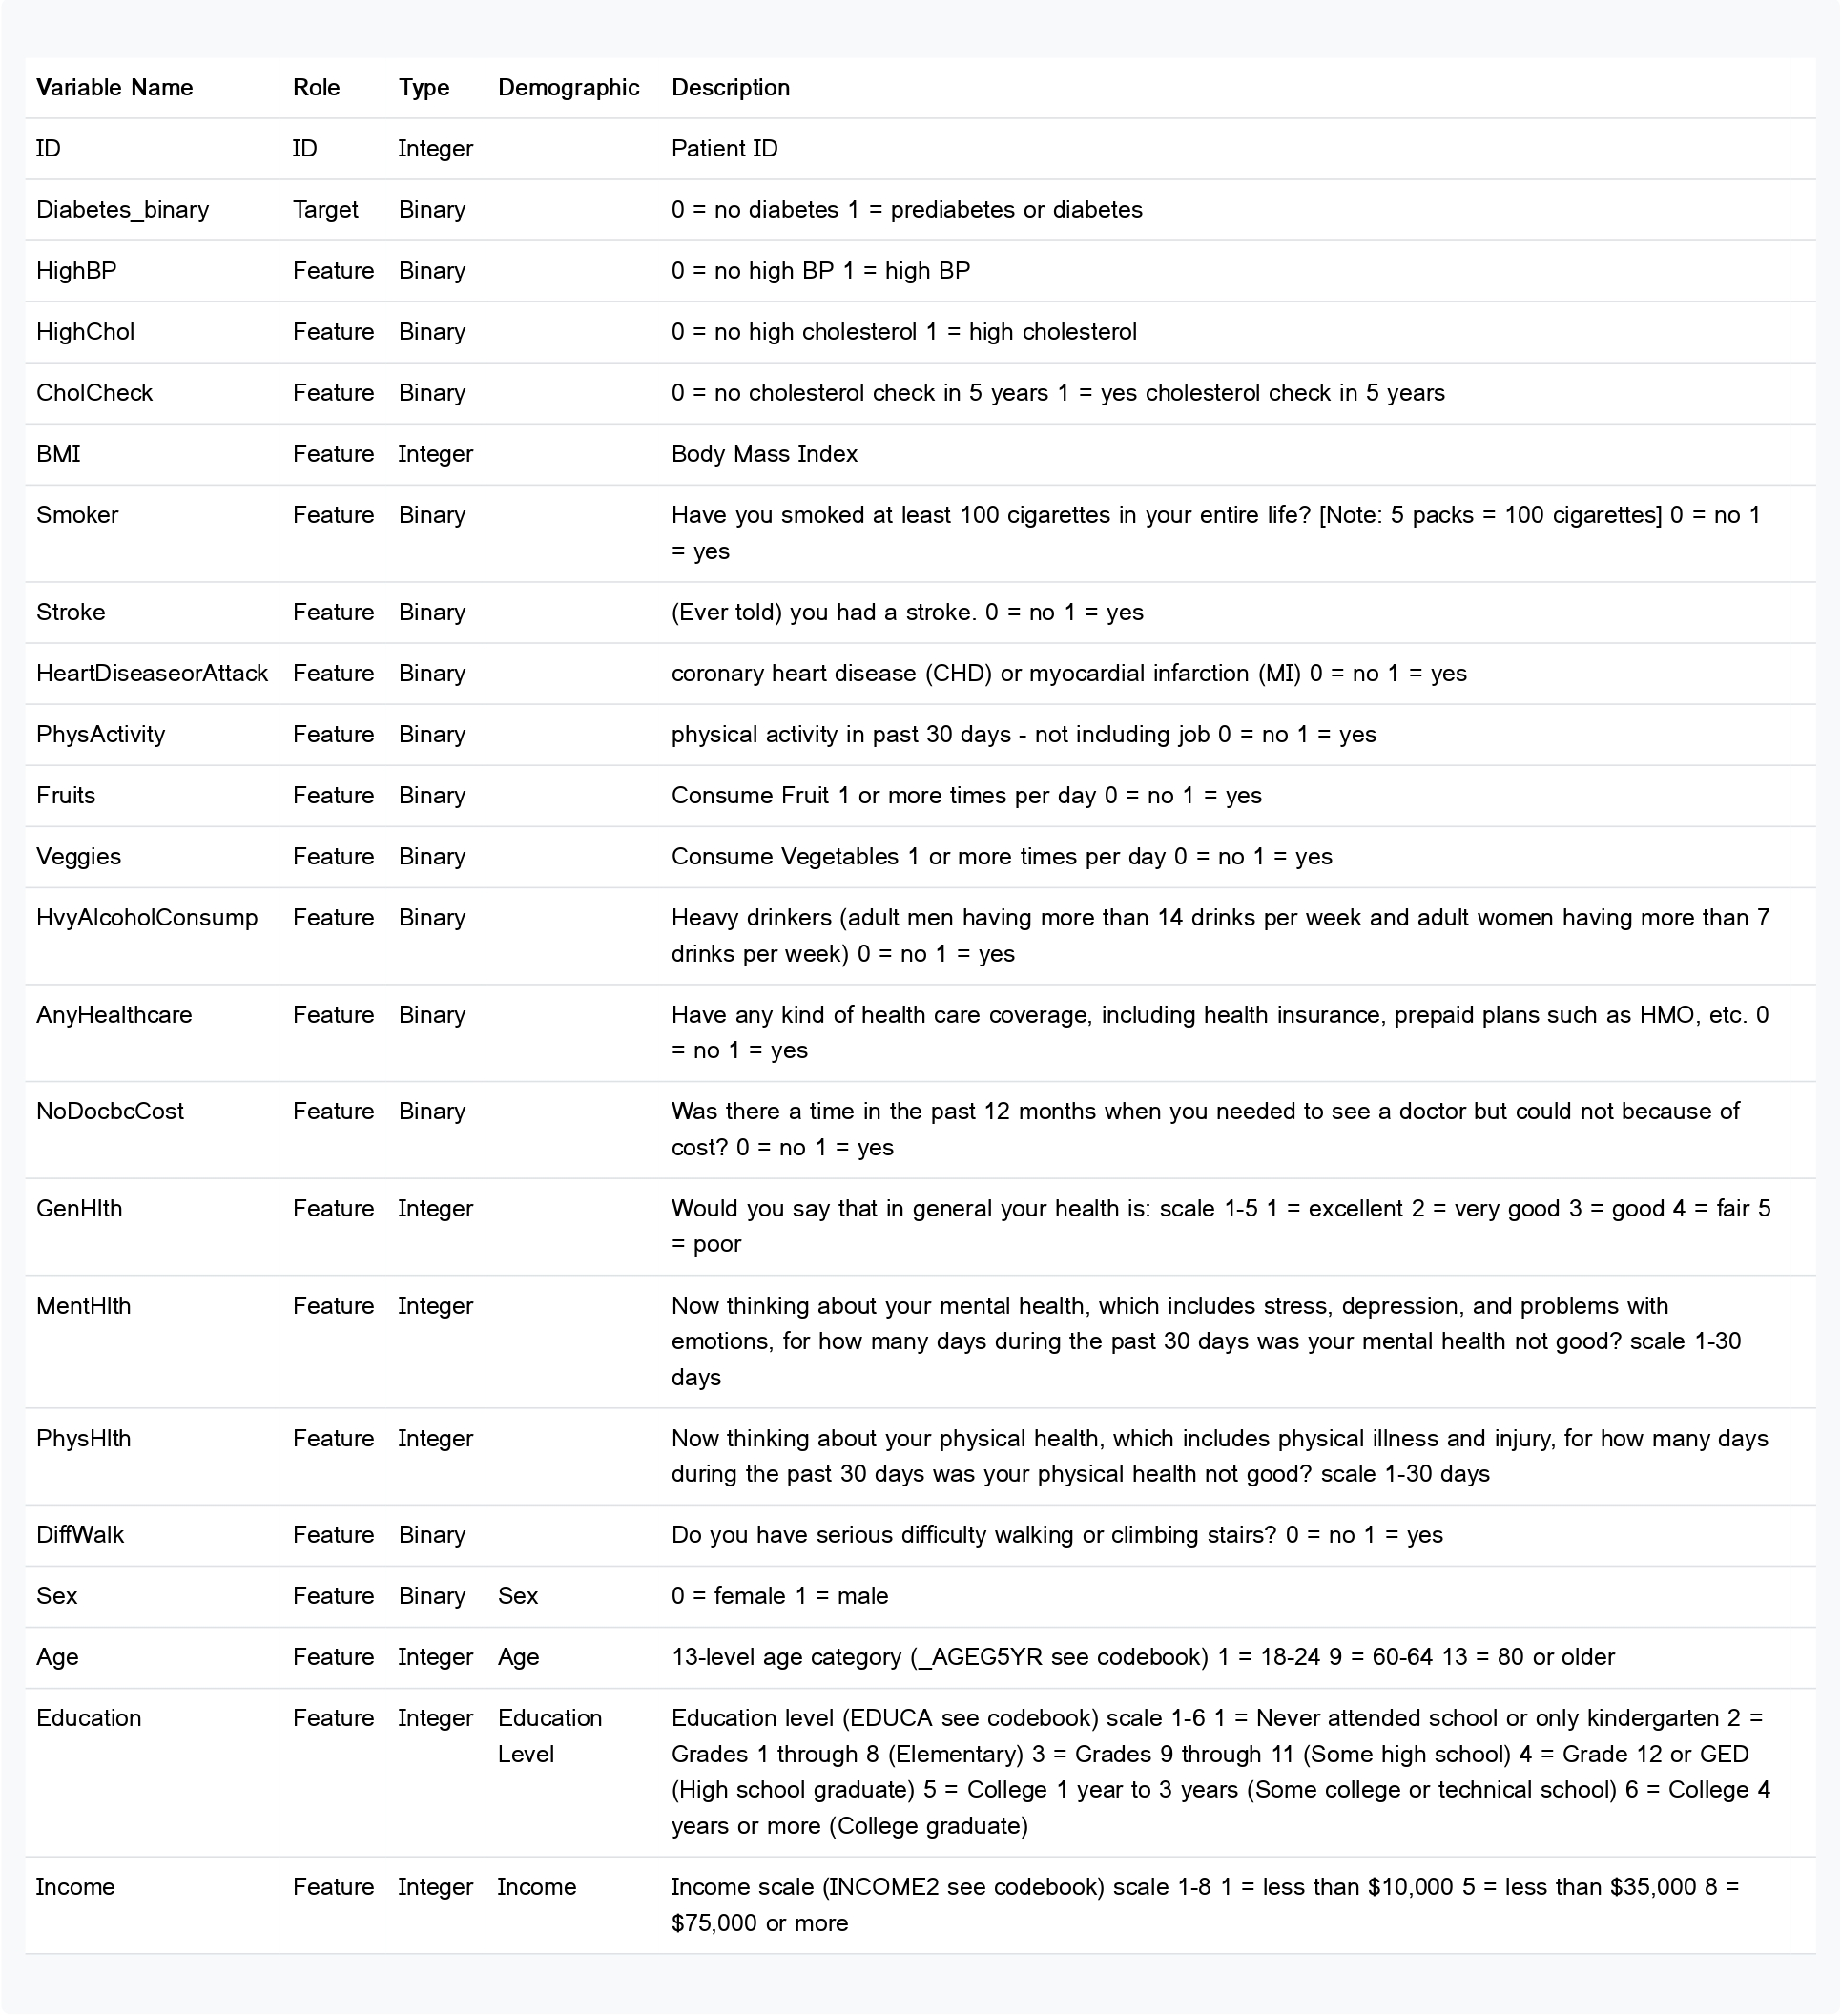

In [3]:
from IPython.display import display, Image
Image('tabela_parametros_page-0001.jpg', width=900, height=900)

## 0.5) Considerações sobre os parâmetros selecionados

* **Racional na escolha dos parâmetros:**  A obtenção da maior quantidade de verdadeiros positivos, ou seja, diagnósticos corretos para os pacientes com diabetes.

* **Estratégia naive:** Para cada um dos algoritmos, foi realizado inicialmente um teste com a seleção de parâmetros feita de modo arbitrário.

* **Divisão do conjunto de dados para teste e treino:**  A escolha deste dimensão é normalmente influenciada pela dimensão do dataset e os tipos de dados. Apenas nos testes com otimizadores de hiperparâmetros é que foi levado em consideração o tamanho das divisões. Foram feitos testes com as seguintes proporções: 75/25, 70/30 e 60/40. sendo mantidas as proporções que obtiveram os melhores resultados.

* **Otimizadores de hiperparâmetros:** Foram feitos testes com Grid Search, Randomized Search e Bayesian Optimization. As escolhas dos parâmetros são baseadas no racional discutido no primeiro tópico. As seleções destes podem ser conferidas nos códigos ao longo do trabalho.

* **Normalização e Oversampling:** Por se tratar de um dataset desbalanceado, buscou-se por meio do métodos MinMaxScaler e SMOTEENN aprimorar o rendimento dos algoritmos de otimização de hiperparâmetros utilizados

* **Testes com otimizadores de hiperparametros para Random Forest e Mulilayer Perceptron:** Possivelmente pelo espaço de busca e as abordagems utilizadas pelos métodos de Random Forest e Rede Neural Multilayer Perceptron, os tempos foram elevados para obtenção de respostas. Estes teste foram realizados em dois computadores diferentes, com um destes computadores demorando cerca de 10 minutos (o teste da rede neural) para a obtenção do resultado.

* **Valores de Precisão e Recall:** Os valores obtidos para precisão e recall das matrizes de confusão refletem os casos de pacientes diabéticos/pré-diabéticos como verdadeiro positivo e os não diabéticos como falso positivo.

# 1) Obtenção e exploração dos dados

## 1.1) Instalação e importação das bibliotecas utilizadas  

In [ ]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install ucimlrepo
%pip install scikit-learn
%pip install scikit-optimize
%pip install imbalanced-learn
%pip install graphviz
%pip install pydotplus

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import seaborn as sns
%matplotlib inline

## 1.2) Importação do Diabetes Health Indicators Dataset

In [3]:
from ucimlrepo import fetch_ucirepo 

cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

In [4]:
X.head()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       0        1  ...              1            0        5   
1             1       0        0  ...              0            1        3   
2             0       1        0  ...              1            1        5   
3             1       1        1  ...              1            0        2   
4             1       1        1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        18        15         1    0    9          4       3  
1         0         0         0    0    7          6       1  
2        30        30         1    0    9          4       8  
3         0         0         0    0   11          3       6  
4         3         0         0    0   11          5       4  

[5 rows x 21 columns]

## 1.3) Checando ausência de valores

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [6]:
X.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## 1.4) Informações estatísticas sobre os dados

In [7]:
X.describe()

HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.000000              0.000000       0.000000   
25%         0.000000       0.000000              0.000000       1.000000   
50%         0.000000       0.000000              0.000000       1.000000   
75%         1.000000       0.000000              0.000000       1.000000   
max         1.000000       1.000000              1.000000       1.000000   

              Fruits        Veggies  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.634256       0.811420  ...       0.951053       0.084177   
std         0.481639       0.391175  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       1.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 21 columns]

## 1.5) Matriz de correlação em função do target Diabetes_binary
	Os coeficientes de correlação acima 0.5 indicam alta correlação entre classes. Nenhuma das classes obteve uma correlação maior que 0.29 com a classe alvo, Diabetes_binary. A baixa relação linear entre as classes possivelmente indica resultados bons para as árvores de decisão. As classes de melhor relação linear com o alvo são: HighBP, BMI, GenHlth, e DiffWalk, como podemos ver após os resultados da matriz de correlação.

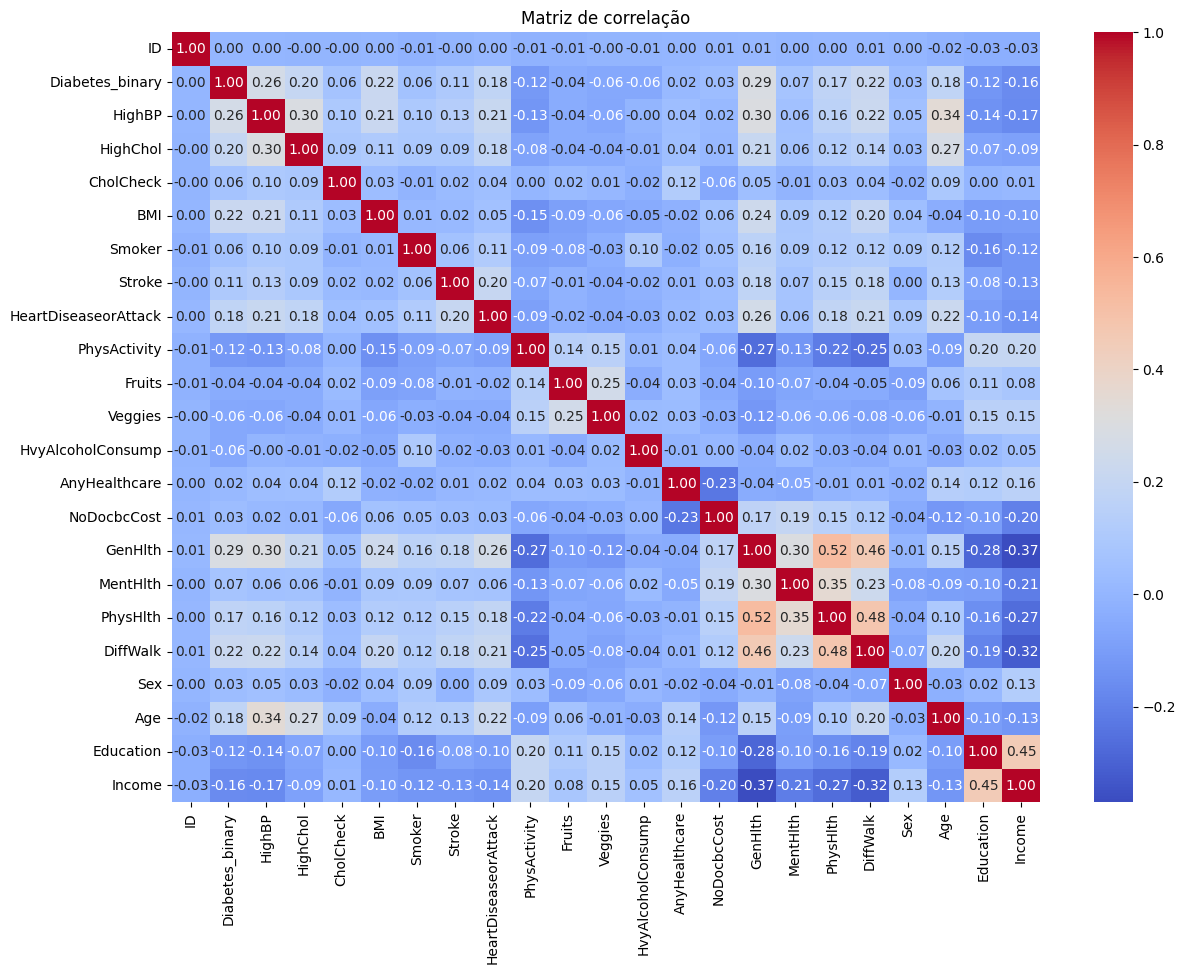

In [16]:
plt.figure(figsize=(14,10))
correlation_matrix = pd.get_dummies(cdc_diabetes_health_indicators.data['original']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Matriz de correlação")
plt.show()

In [9]:
c = cdc_diabetes_health_indicators.data['original'].drop(columns=["ID"])
d = c.corr()['Diabetes_binary']
d[abs(d) >= 0.21].index[1:]

Index(['HighBP', 'BMI', 'GenHlth', 'DiffWalk'], dtype='object')

# 2) Árvore de Decisão
	A árvore de decisão é uma técnica de aprendizado de máquina supervisionada, usada tanto em problemas de classificação quanto de regressão. Trata-se de uma estrutura hierárquica como modelo preditivo sobre um conjunto de dados, composta por nós e ramos que os conectam.
    
	O nó mais superior da estrutura é chamado de nó raíz, enquanto os terminais são denominados nós folha. Cada nó interno - isto é, os nós não folha - representam um ponto de decisão para um determinado atributo do dataset, com os ramos da árvore representam as divisões dos dados de acordo com os resultados destas escolhas, direcionando para outros nós. Os nó folha representam os rótulos de classificação para um atributo alvo dos dados, não ocorrendo mais divisões nestes.
    
	A construção da árvore se dá pela partição dos dados em subconjuntos, de maneira recursiva, por meio de um algoritmo guloso. Cada partição se dá por um conjunto de regras definido e o critério de parada para as subdivisões se dá quando o nó tem os mesmos valores da variável alvo ou quando a divisão não adiciona mais valor para as predições do modelo. Os critérios de divisão podem ser baseados em métricas como GINI e entropia.

In [33]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score
import graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

## 2.1) Estratégia naive:

#### Separação dos dados

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Criação da Decision Tree e execução do treinamento

In [36]:
clf = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=10, min_samples_split=5, criterion='gini')
clf2 = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#### Acurácia e Score F1 do Modelo

In [38]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(accuracy * 100))
print("Score F1: {:.2f}%".format(f1 * 100))

Acurácia: 86.37%
Score F1: 28.33%


#### Visualização da Árvore de Decisão
    A partir da árvore, é possível notar a grande relevância das features HighBp e GenHlth possuem para nas decisões de splitting e pelos nós folhas, um desquilíbrio dos dados pendendo para o conjunto de pacientes sem diabetes, como sera discorrido mais adiante.

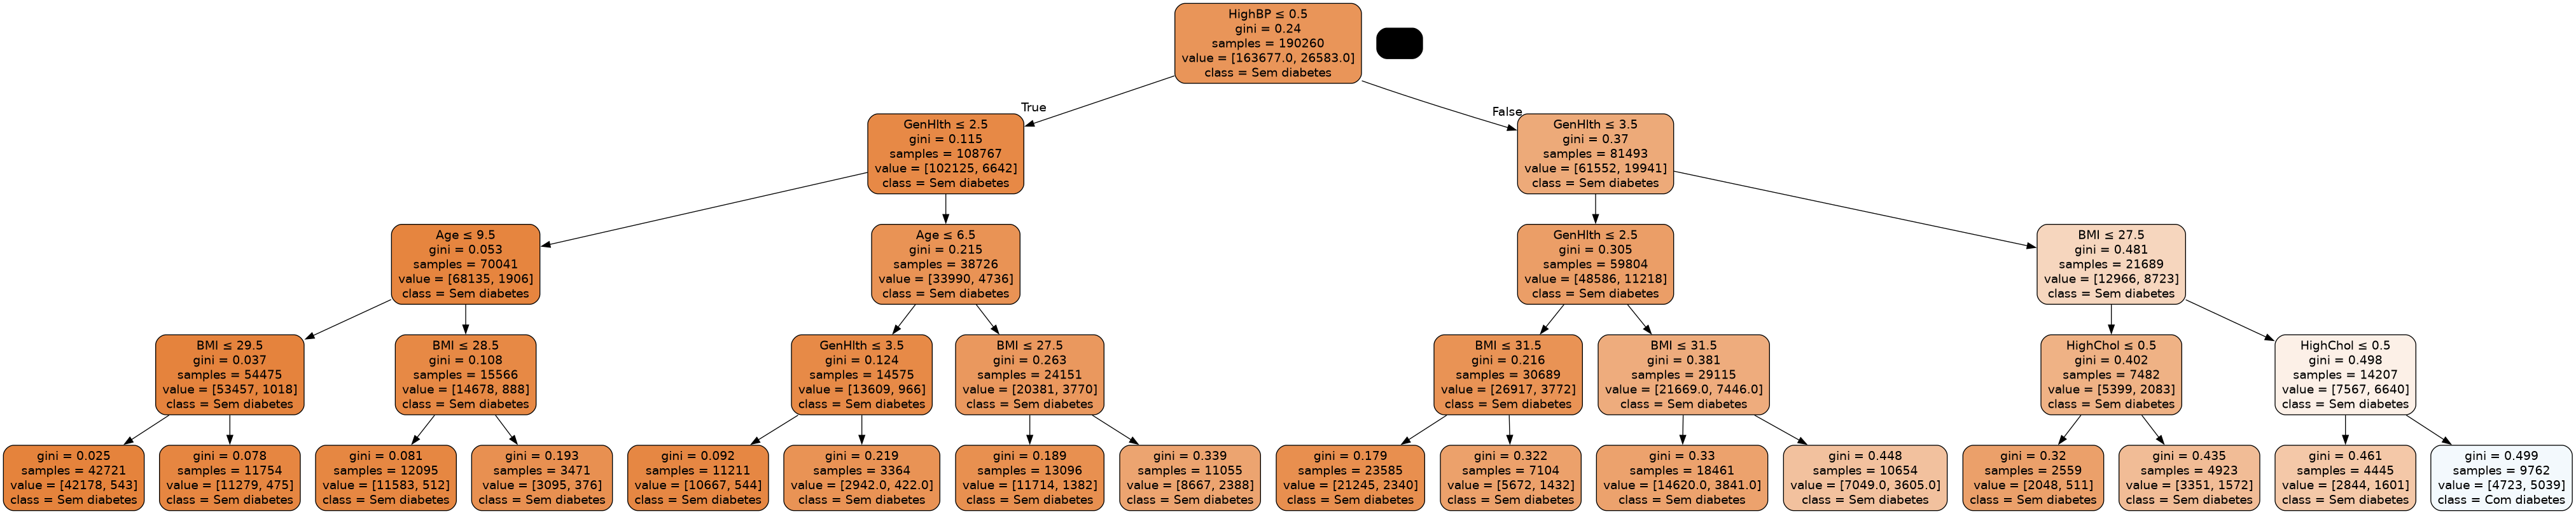

In [39]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns, class_names= ["Sem diabetes", "Com diabetes"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

#### Contribuição das features para a Árvore de Decisão
    Aqui podemos observar que os fatores com grande relevância para o splitting na árvore de decisão foram principalmente: HighBP e GenHlth

<Axes: >

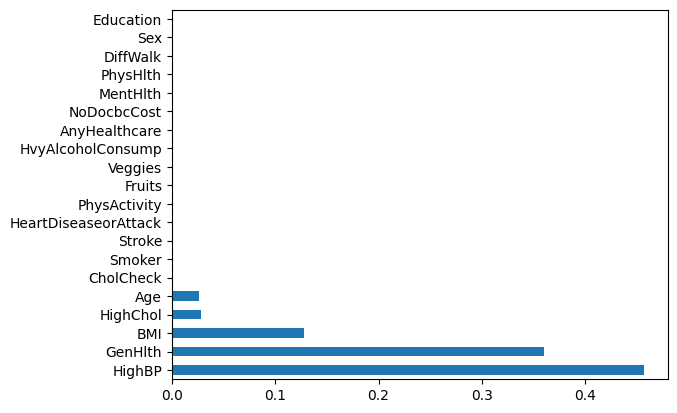

In [41]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

#### Matriz de confusão

Text(0.5, 1.0, 'Matriz de confusão')

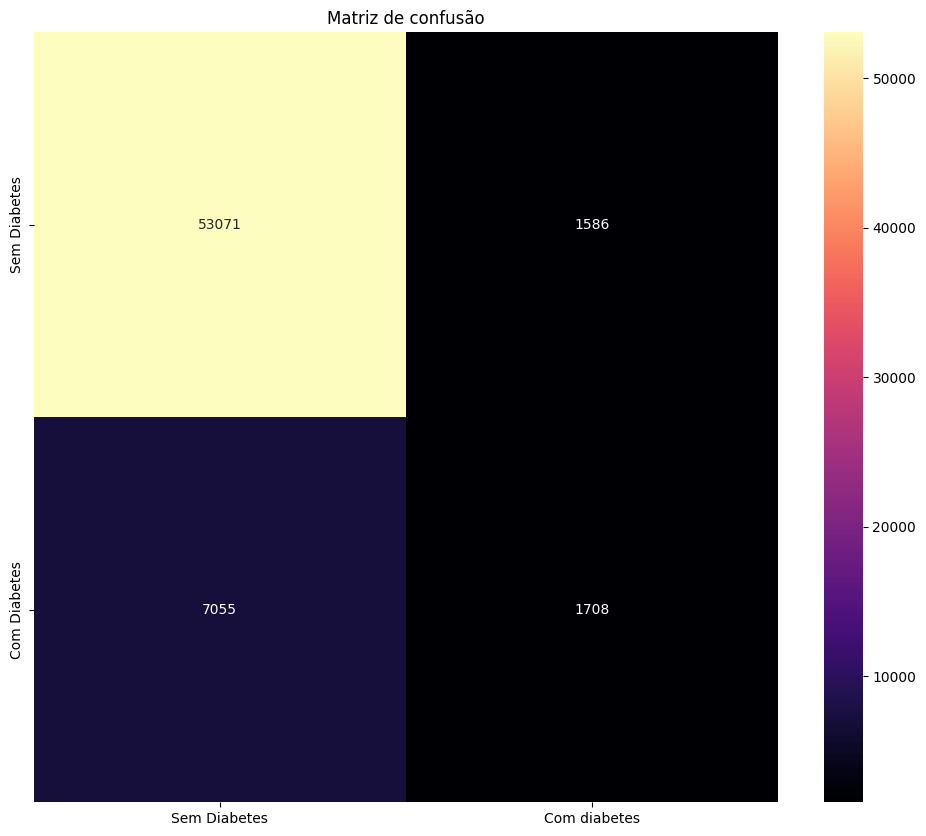

In [42]:
cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cfm, annot=True, cmap='magma', fmt='d', 
            xticklabels=["Sem Diabetes", "Com diabetes"], yticklabels=["Sem Diabetes", "Com Diabetes"])
plt.title('Matriz de confusão')

#### Valores de Precisão e Recall

In [43]:
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred) * 100))

Precisão: 51.85%
Recall: 19.49%


#### Observações
	A matriz de confusão - denotando-se os valores baixos para recall e precisão, em especial - em conjunto com o score F1 apontam para um desequilíbrio no dataset, como veremos a seguir. Também na matriz de confusão, podemos observar que houve um baixo número de acertos para casos de diabete.
    
	É importante salientar que a diabetes não tratada pode levar a sérias consequências de saúde, assim como redução na qualidade de vida. Logo, foi considerado neste trabalho como fundamental aprimorar o número de verdadeiros positivos, mesmo que os resultados geram um aumento  de falsos positivos. Os casos falsos positivos não levam a graves consequências, pois o tratamento para diabetes não se trata de um procedimento invasivo e os medicamentos utilizados não geram efeitos graves para pessoas sem diabetes.

#### Desequilíbrio dos Dados
&emsp;&emsp;De acordo com esta [referência](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets), a classe minoritária - com diabetes neste caso - bastaria representar pelo menos 20%  a 40% do dataset para ser considerada desiquilibrada. Como podemos observar logo abaixo, a porcentagem é em torno de 14%, o que está dentro da faixa de desbalanço moderado.

In [44]:
y_values = y['Diabetes_binary'].value_counts().sort_index()
y_frame = pd.DataFrame({"Sem diabetes":[ y_values[0]], "Com diabetes": [y_values[1]]})
y_frame.index = ["Quantidade"]
y_frame

Sem diabetes  Com diabetes
Quantidade        218334         35346

In [45]:
print("Porcentagem pertencente à classe minoritária: {:.2f} %".format(y_values[1]/y_values.sum() * 100))

Porcentagem pertencente à classe minoritária: 13.93 %


## 2.2) Utilizando Grid Search com Validação Cruzada
	Com base nos resultados anteriores, buscou-se um otimizador de hiperparâmetros para a Decision Tree, através do módulo presente no SciKit Learn, GridSearchCV. O algoritmo grid search realiza o treinamento de um modelo realizando todas as combinações possíveis de valores provenientes de um grid de hiperparâmetros. Em seguida, por meio de validação cruzada, os dados são divididos em subconjuntos e todas as combinações de parâmetros obtidas do grid search são testadas nesses subconjuntos, a fim de se obter a melhor.

#### Parâmetros para o grid search
	O racional de escolha dos parâmetros visou a reduzir o desbalanço e overfitting do dataset. Outros parâmetros aqui mencionados também pode auxiliar neste objetivo, porém testes não incluídos nesta avaliação não demonstraram ganhos significativos. Dentre as escolhas feitas com este objetivo podemos citar:
    
	. Baixos valores para max_depth, pois uma árvore de grande profundidade é mais propensa a overfitting
    
	. Valores altos para min_samples_splitting - que determina o número mínimo de amostras para ocorrer um split-  pois valores baixos também tendem gerar árvores mais profundas e complexas
    
	. Inclusão de valores altos para min_samples_leaf, que determina o número mínimo de amostras presentes nos nós folha, também auxilia a redução de overfitting

In [10]:
param_grid = {
    'max_depth': [4,5,6],
    'min_samples_split': range(2,11),
    'min_samples_leaf': range(1,4),
}

#### Árvore de Decisão utilizada

In [11]:
clf = DecisionTreeClassifier(random_state=42)

#### Separação de Dados

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#### Uso do método MinMaxScaler para otimizar o treinamento
    Este método auxilia o treinamento através de uma padronização dos dados, retirada de outliers e aprimorando a convergência.

In [13]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Uso do método SMOTEENN para reduzir o desequilíbrio dos dados
	O SMOTEENN é uma estratégia híbrida para contornar o desequilíbrio encontrado em um dataset. O método funciona com a combinação das abordagens SMOTE (Synthetic Minority Over-sampling Technique) e ENN (Edited Nearest Neighbors). A técnica SMOTE realiza um aumento artificial (oversampling) para a classe desequilibrada com base em dados existentes no dataset. Já a técnica ENN visa a refinar que pode ser produzido pelo SMOTE, visando a reduzir o overfitting e melhorar a performance do modelo.

In [14]:
smoteenn = SMOTEENN(sampling_strategy='auto')
X_train, y_train = smoteenn.fit_resample(X_train, y_train)

#### Inicialização e treino utilizando f1 como critério de scoring
	Por se tratar de um dataset desbalanceado, como observado nos dados anteriores, foi utilizada a opção de scoring f1 - também chamado de f1 weighted - que realiza o cálculo de F1 levando em consideração a distribuição de classes existente no conjunto de dados, realizando uma média ponderada baseada na quantidade de elementos verdadeiros presentes de cada classe. Esta opção de scoring também será utilizada nos outros métodos requisitados nesta atividade.

	Outro parâmetro testado ao longo da atividade é o que determina o número de validações cruzadas: cv. Devido ao aumento do tempo de execução observado, todos os testes com otimizadores de hiperparâmetros mantiveram o valor padrão (5).

	O critério para se determinar a qualidade dos splits foi o gini: não demonstrado no código e definido como padrão. A opção entropy também foi testada, não trazendo melhora nos scores.

In [15]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

#### Visualização da Árvore de Decisão
    Podemos observar uma maior quantidade classes indicando pacientes diabéticos (Com diabetes), além de uma melhora do valor de GINI para alguns dos nós folha. Isto indica uma maior "pureza" - mais representantes de uma mesma classe - nestes nós folha.

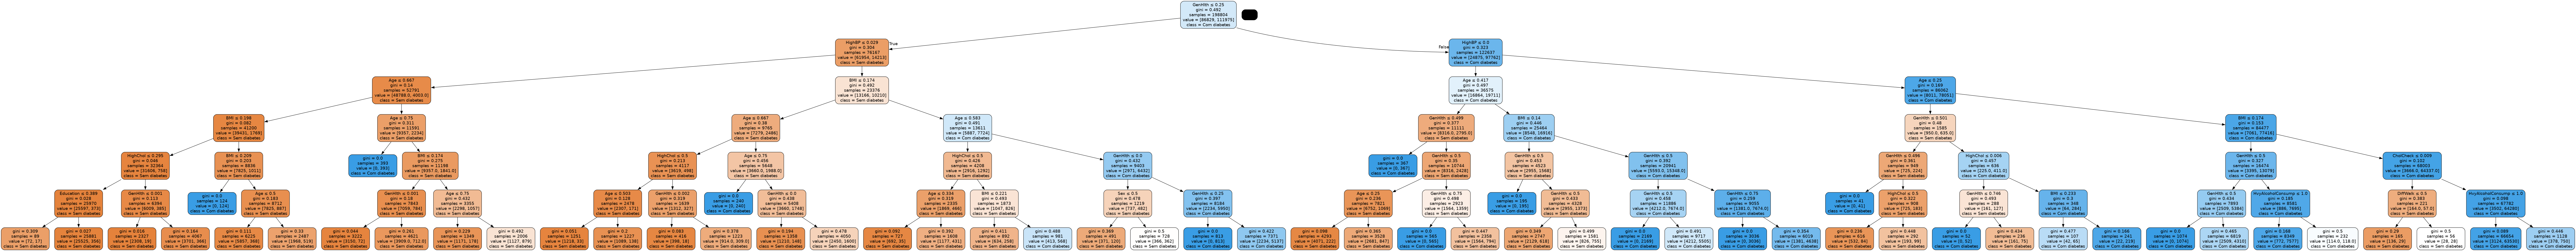

In [16]:
dot_data = StringIO()
export_graphviz(grid_search.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns, class_names = ["Sem diabetes", "Com diabetes"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_com_grid.png')
Image(graph.create_png())

#### Resultados do GridScore, Acurácia e F1 score

In [17]:
print("Best estimator: {}".format(grid_search.best_estimator_))
print("Best params: {}".format(grid_search.best_params_))
print("Acurácia: {:.2f}%".format(grid_search.best_score_ * 100))
print("F1 score: {:.2f}%".format(f1_score(y_test, y_pred)* 100))

Best estimator: DecisionTreeClassifier(max_depth=6, random_state=42)
Best params: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Acurácia: 88.35%
F1 score: 41.42%


#### Matriz de confusão

Text(0.5, 1.0, 'Matriz de confusão')

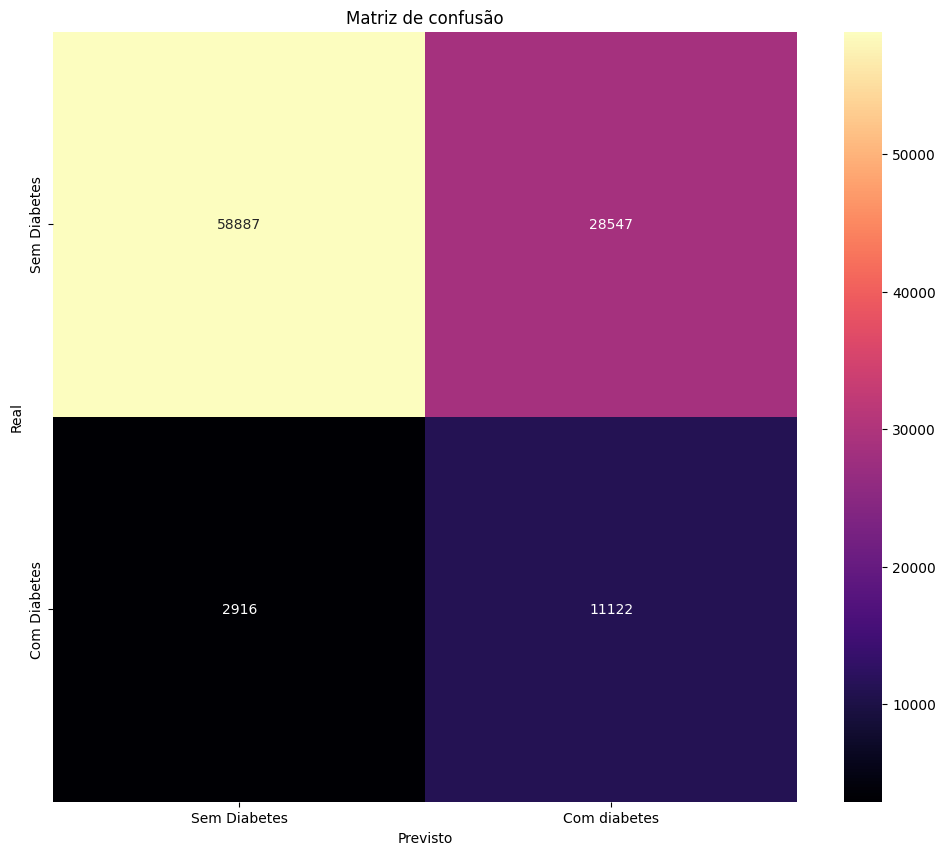

In [18]:
cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cfm, annot=True, cmap='magma', fmt='d',
            xticklabels=["Sem Diabetes", "Com diabetes"], yticklabels=["Sem Diabetes", "Com Diabetes"])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de confusão')

In [19]:
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred) * 100))

Precisão: 28.04%
Recall: 79.23%


#### Comparativo entre os valores obtidos de Naive e Grid Search CV

In [2]:
values_decision_tree = pd.DataFrame({"Acurácia":["86.37%","88.35%"],
                                     "F1":["28.33%","41.42%"],
                                     "Precisão":["51.85%","28.04%"], 
                                     "Recall":["19.49%","79.23%"]})
values_decision_tree.index =  ["Naive", "Grid Search CV"]
values_decision_tree

Acurácia      F1 Precisão  Recall
Naive            86.37%  28.33%   51.85%  19.49%
Grid Search CV   88.35%  41.42%   28.04%  79.23%

#### Observações
	Como discutido na tentativa anterior, é possível observar que o dataset sofre de fato um desbalanço. Após a utilização de otimizações que visam contornar o problema - como o scoring='f1' do grid search com validação cruzada, e a redução de overfitting colocando valores baixos para a profundidade da árvore nos parâmetros - é possível notar uma melhora no cálculo de F1 e recall.
        
	Como podemos observar na matriz de confusão, houve uma melhora na identificação de verdadeiros positivos, refletido pelo aumento do valor de Recall. A queda do valor de precisão se dá pelo aumento de falsos positivos, que como mencionado anteriormente, é uma questão de menor relevância para este dataset, visto que pacientes diagnosticados incorretamente com diabetes sofrem pouco impacto dos medicamentos utilizados, além de ser possível recorrer facilmente a testes alternativos que comprovem o contrário.

# 3) Random Forest
	O Random Forest é uma técnica de aprendizado de conjunto para problemas de classificação ou regressão. Trata-se de um método de aprendizado de máquina supervisionado. Consiste da criação de uma determinada quantidade de árvores de decisão durante o treinamento, a fim de se chegar em uma previsão de com maior acurácia sobre a variável alvo.
    
	As árvores são construídas por uma abordagem denominada Bootstrap Aggregation ou Bagging, onde múltiplos subconjuntos aleatórios dos dados são feitos para a criação de modelos. A divisão destes subconjuntos é feita de maneira aleatória, com o objetivo de garantir diversidade na criação das árvores e para a redução de overfitting. Em seguida ocorre uma 'fusão' das árvores geradas para se chegar na previsão de maior acurácia e menor overfitting.

## 3.1) Estratégia naive

In [12]:
from sklearn.ensemble import RandomForestClassifier

#### Separação dos dados

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Inicialização e treino por Random Forest

In [14]:
rfc = RandomForestClassifier(n_estimators=400,random_state=42)
rfc = rfc.fit(X_train, y_train.values.ravel())
y_pred = rfc.predict(X_test)

#### Acurácia e Score F1

In [15]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(accuracy * 100))
print("Score F1: {:.2f}%".format(f1 * 100))

Acurácia: 86.05%
Score F1: 25.47%


#### Matriz de confusão

Text(0.5, 1.0, 'Matriz de confusão')

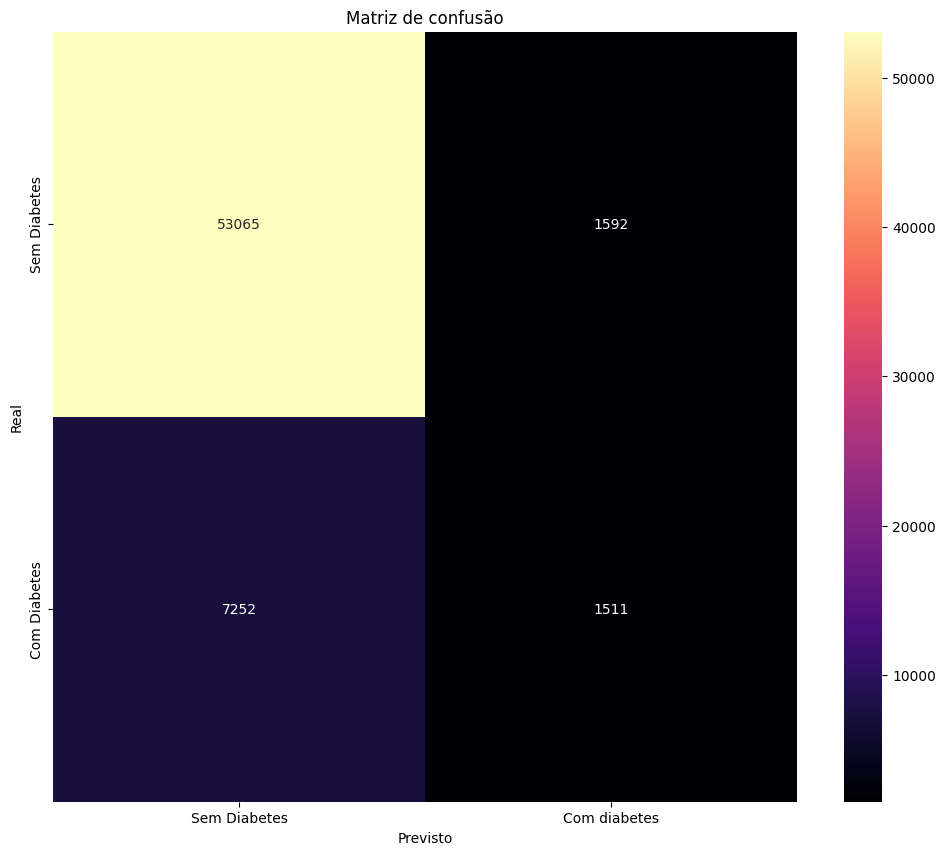

In [16]:
cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cfm, annot=True, cmap='magma', fmt='d', 
            xticklabels=["Sem Diabetes", "Com diabetes"], yticklabels=["Sem Diabetes", "Com Diabetes"])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de confusão')

#### Valores de Precisão e Recall

In [17]:
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred) * 100))

Precisão: 48.69%
Recall: 17.24%


## 3.2) Utilizando Bayes Optimization
	Este método foi escolhido no lugar do de GridSearchCV devido ao tempo gasto para a produção da resposta. Isto provavelmente se deve à forma de funcionamento deste algoritmo, que testa todas as combinações possíveis de parâmetros, e ao tamanho do dataset.
    
	O método Bayes Optimization foi escolhido por possuir maior eficiência que o de Grid Search. Este método funciona com a utilização de uma função "caixa preta" - ou seja, não se sabe os detalhes de seu comportamento - para um problema, que é refinada a cada iteração feita pelo método com objetivo de se aproximar desta função, dessa forma obtendo-se os melhores parâmetros.


#### Parâmetros para o Bayes Optimization
    Com igual objetivo ao da Decision Tree, a escolha reflete a necessidade de redução do desbalanço do dataset. Dentre os parâmetros utilizados, podemos destacar o n_estimators, que determina o número de árvores da Random Forest. Quanto maior este valor, melhor a performance, porém maior o tempo de execução. Devido ao tempo de execução, foi selecionado um range entre 100 e 200 para esta atividade. 

In [11]:
param_bayes = {
    'n_estimators': (100, 200),
    'max_depth': (4,5),
    'min_samples_split': (2,11),
    'min_samples_leaf': (1,4)
}

#### Random Forest utilizada

In [12]:
rfc = RandomForestClassifier(random_state=42)

#### Separação dos dados

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#### Otimização com MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Uso do método SMOTEENN para reduzir o desequilíbrio dos dados

In [15]:
smoteenn = SMOTEENN(sampling_strategy='auto')
X_train, y_train = smoteenn.fit_resample(X_train, y_train)

#### Inicialização e treino utilizando f1 como critério de scoring

In [16]:
bayes = BayesSearchCV(rfc,param_bayes,n_iter=20,cv=5,n_jobs=-1,random_state=42,scoring='f1')
bayes = bayes.fit(X_train, y_train.values.ravel())
y_pred = bayes.predict(X_test)

#### Acurácia, Score F1 e parâmetros do Bayes Optimization

In [17]:
print("Best params: {}".format(bayes.best_params_))
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("F1 score: {:.2f}%".format(f1_score(y_test, y_pred)* 100))

Best params: OrderedDict({'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 200})
Acurácia: 68.98%
F1 score: 42.02%


#### Matriz de confusão

Text(0.5, 1.0, 'Matriz de confusão')

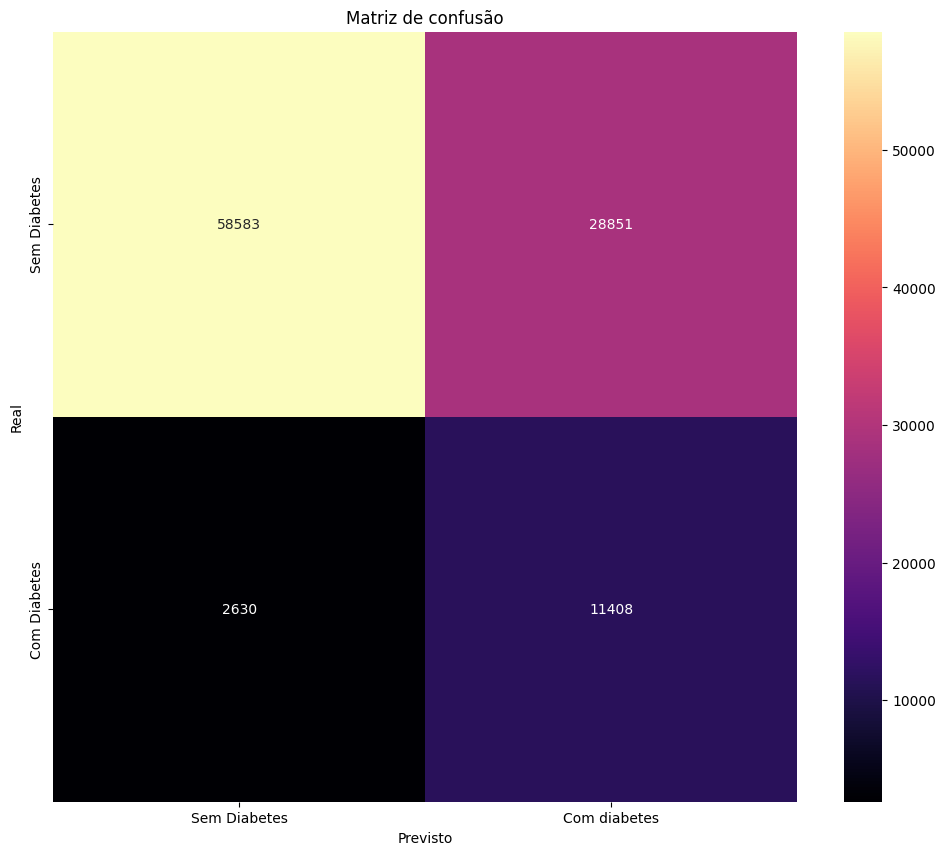

In [18]:
cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cfm, annot=True, cmap='magma', fmt='d', 
            xticklabels=["Sem Diabetes", "Com diabetes"], yticklabels=["Sem Diabetes", "Com Diabetes"])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de confusão')

#### Precisão e Recall

In [19]:
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred) * 100))

Precisão: 28.34%
Recall: 81.27%


#### Comparativo entre os valores obtidos de Naive e Bayes Optimization

In [3]:
values_random_forest = pd.DataFrame({"Acurácia":["86.05%","68.98%"],
                                     "F1":["25.47%","42.02%"],
                                     "Precisão":["48.69%","28.34%"], 
                                     "Recall":["17.24%","81.27%"]})
values_random_forest.index =  ["Naive", "Bayes Optimization"]
values_random_forest

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Acurácia      F1 Precisão  Recall
Naive                86.05%  25.47%   48.69%  17.24%
Bayes Optimization   68.98%  42.02%   28.34%  81.27%

#### Observações
	Em razão do método de Grid Search ser custoso, foi escolhido para a otimização de hiperparâmetros o método de Bayes Optimization. A escolha de parâmetros para o método de Bayes Optimization refletiu a necessidade de se reduzir o tempo de execução da Random Forest. A queda observada em Precisão e o aumento do valor Recall possivelmente ocorreu pelos mesmos motivos discutidos em Decision Tree.

	A queda de acurácia possivelmente se deu pelo desbalanço presente nos dados: a previsão do modelo estaria mais enviesada para os pacientes sem diabete dos que os diabéticos/pré-diabéticos. As abordagens utilizadas reduziram esse desbalanço, o que por consequência teria afetado a acurácia do modelo. Logo, a acurácia por talvez não seja um bom critério de avaliação para este dataset, visto o viés que possui para os pacientes não diabéticos. Outra explicação seria a escolha dos parâmetros para o otimizador, que simplesmente prejudicaram a acurácia.
    
	Normalmente, a estratégia de random forest oferece resultados melhores que os de uma decision tree, sendo um dos motivos, o tamanho do espaço de busca desta técnica. Os ganhos marginais quando comparados com os da Decision Tree podem ter acontecido pelas seguintes razões:
    
	. A grande influência de poucas features - em especial GenHlth e HighBP -  nas decisões de splitting, o que poderia ser mais facilmente representado em uma simples decision tree e geraria baixa diversidade na produção de árvores na random forest.
    
	. A escolha de parâmetros,  foi influenciada pela lentidão ao se obter os resultados para a random forest. Isto se deve pela própria forma como funciona o algoritmo, sendo necessário a produção de uma determinada quantidade de árvores de decisão para a produção de uma resposta e portanto, mais lenta que a técnica de Decision Tree.

# 4) Rede Neural Multilayer Perceptron
	A Rede Neural Multilayer Perceptron é uma de rede neural feedfoward, composta por múltiplas camadas de neurônios (nodos) conectadas entre si - com uma camada de neurônios sendo também chamada de perceptron - é utilizada tanto para aprendizado supervisionado quanto para regressão. O multilayer perceptron possui pelo menos uma camada intermediária de neurônios
    
	O conjunto de camadas que compõem a rede neural é dividida em uma camada de entrada, uma ou mais camadas intermediárias e uma camada de saída. As camadas de entrada recebem a informação, onde o número de neurônios que pertencem a esta é igual a quantidade de features existentes em um um conjunto de dados. Já as camadas intermediárias, que podem ser compostas por uma quantidade variável de neurônios,são responsáveis pelo processamento da informação recebida pela camada de input. Por fim, as camadas de saída são as responsáveis por gerar a previsão.

	O funcionamento de uma Rede Neural Multilayer Perceptron passa pelas seguintes etapas: Forward Propagation, cálculo da função de perda e Backpropagation.
    
	Em foward propagation, a informação é passada para os neurônios da camada de entrada até chegar aos da saída, onde cada um dos neurônios da camada intermediária recebem da camada de entrada uma quantidade de inputs, de cada um associados a um peso. Em seguida, ocorre o processamento destes somatórios de inputs por meio de uma função de ativação mais a adição de um viés. O resultado deste processamento no neurônio determina se ocorre ou não a ativação do neurônio.
    
	Após a geração da saída, ocorre a etapa do cálculo da função de perda, sendo feita a comparação dos resultados esperados e os obtidos na previsão. Por fim, temos a etapa de Backpropagation. Neste algoritmo, são feitos os ajustes dos pesos e do viés com objetivo de minimizar a função de perda. Estas três etapas são repetidas até que ocorra a convergência do modelo, o refinamento dos pesos e vieses e a minimização da função de perda. 

## 4.1) Estratégia Naive

In [5]:
from sklearn.neural_network import MLPClassifier

#### Separação dos dados

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Inicialização e treino por Rede Neural Multilayer Perceptron

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),max_iter=1000, random_state=42)
mlp.fit(X_train, y_train.values.ravel())
y_pred = mlp.predict(X_test)

#### Acurácia e Score F1

In [8]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(accuracy * 100))
print("Score F1: {:.2f}%".format(f1 * 100))

Acurácia: 86.39%
Score F1: 32.25%


#### Matriz de confusão

Text(0.5, 1.0, 'Matriz de confusão')

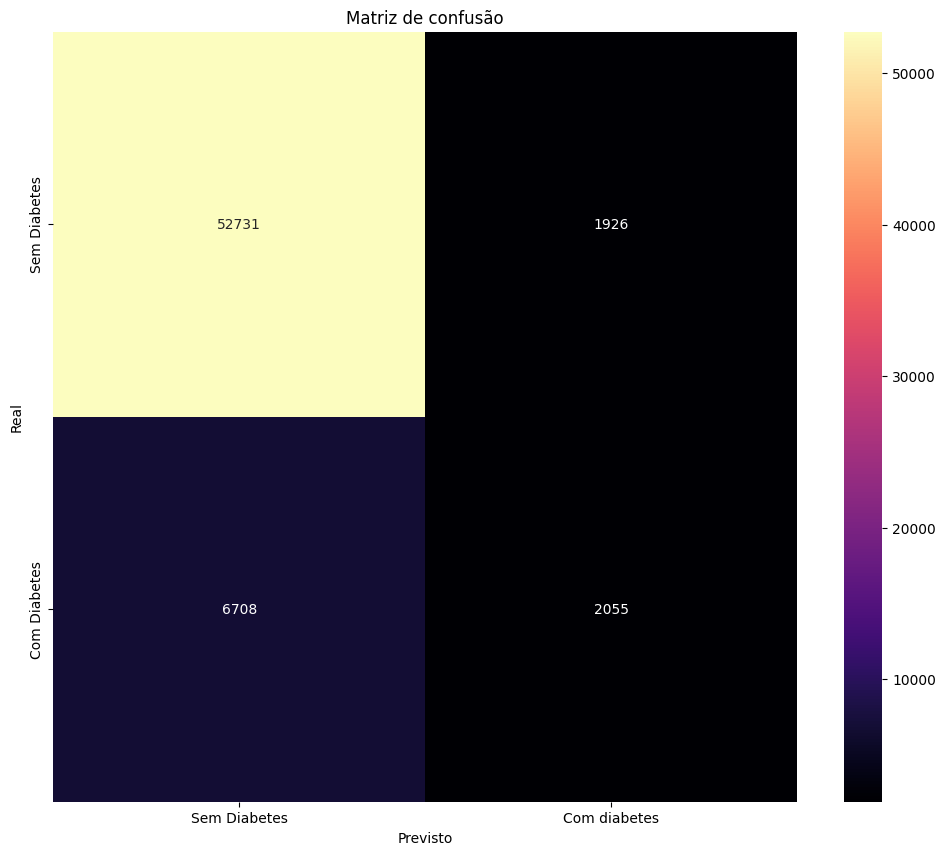

In [9]:
cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cfm, annot=True, cmap='magma', fmt='d', 
            xticklabels=["Sem Diabetes", "Com diabetes"], yticklabels=["Sem Diabetes", "Com Diabetes"])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de confusão')

#### Precisão e Recall

In [10]:
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred) * 100))

Precisão: 51.62%
Recall: 23.45%


## 4.2) Utilizando Randomized Search com Validação Cruzada
    O randomized search é um método de otimização de hiperparâmetros que funciona de maneira semelhante ao grid search, onde porém, este não testa todas as combinações de possíveis de valores: um grupo fixo de valores é escolhido e testado aleatoriamente, sob um determinado número de iterações.

#### Rede Neural Multi Perceptron utilizada

In [ ]:
mlp = MLPClassifier(random_state=42)

#### Separação dos dados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#### Otimização com MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Uso do método SMOTEENN para reduzir o desequilíbrio dos dados

In [33]:
smoteenn = SMOTEENN(sampling_strategy='auto')
X_train, y_train = smoteenn.fit_resample(X_train, y_train)

#### Parâmetros utilizados
	Assim como discutido para os casos em que foram utilizados a Decision Tree e a Random Forest, foi selecionado um conjunto de valores para o grid de hiperparâmetros. Alguns destes foram:
    
	. hidden_layer_sizes: Determina a quantidade de neurônios da camada intermediária. As combinações usadas foram as que menos consumiram tempo de execução.
    
	. activation: A função de ativação para as camadas intermediárias. Relu em geral é mais utilizada.

	. alpha: Representa a regularização L2, ou Ridge. A regularização é uma penalidade para a função de perda, com o objetivo evitar pesos de alto valor. Maiores valores de alpha reduzem com mais eficiência o overfitting.

	. max_iter: O número de iterações que serão executadas para o treinamento do modelo. Quanto maior, mais eficiente é o treinamento, ao custo de um maior tempo de execução. O valor selecionado foi o que obteve a relação custo-benefício para a atividade. Valores inferiores não conseguiram convergir.

	. early_stopping: Termina o treinamento caso o score de validação não esteja melhorando. Trata-se de um parâmetro importante para casos de overfitting.

	. validation_fraction: porcentagem utilizada para validação para o early stopping.

	. n_iter_no_change: determina o número de iterações máximo que podem acontecer sem melhora do score de validação

In [34]:
param_mlp = {
    'hidden_layer_sizes': [(50,),(50,50), (100,)], 
    'activation': ['tanh', 'relu'],     
    'solver': ['adam', 'sgd'],                     
    'alpha': [0.0001, 0.001, 0.01],               
    'learning_rate': ['constant', 'invscaling'],   
    'max_iter': [500],
    'early_stopping': [True],                          
    'validation_fraction': [0.1, 0.2],                
    'n_iter_no_change': [10, 20],                
}

#### Inicialização e treino utilizando f1 como critério de scoring
    Foi feita uma redução no número de iterações, devido ao tempo de execução.

In [35]:
random_search = RandomizedSearchCV(mlp, param_distributions=param_mlp, n_iter=5, cv=5, 
                                   verbose=0,random_state=42,n_jobs=-1)

random_search.fit(X_train, y_train.values.ravel())
y_pred = random_search.predict(X_test)

#### Acurácia, Score F1 e parâmetros do Randomized Search

In [36]:
print("Best estimator: {}".format(random_search.best_estimator_))
print("Best params: {}".format(random_search.best_params_))
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("F1 score: {:.2f}%".format(f1_score(y_test, y_pred)* 100))

Best estimator: MLPClassifier(activation='tanh', early_stopping=True,
              learning_rate='invscaling', max_iter=500, n_iter_no_change=20,
              random_state=42, validation_fraction=0.2)
Best params: {'validation_fraction': 0.2, 'solver': 'adam', 'n_iter_no_change': 20, 'max_iter': 500, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100,), 'early_stopping': True, 'alpha': 0.0001, 'activation': 'tanh'}
Acurácia: 70.03%
F1 score: 42.34%


#### Matriz de Confusão

Text(0.5, 1.0, 'Matriz de confusão')

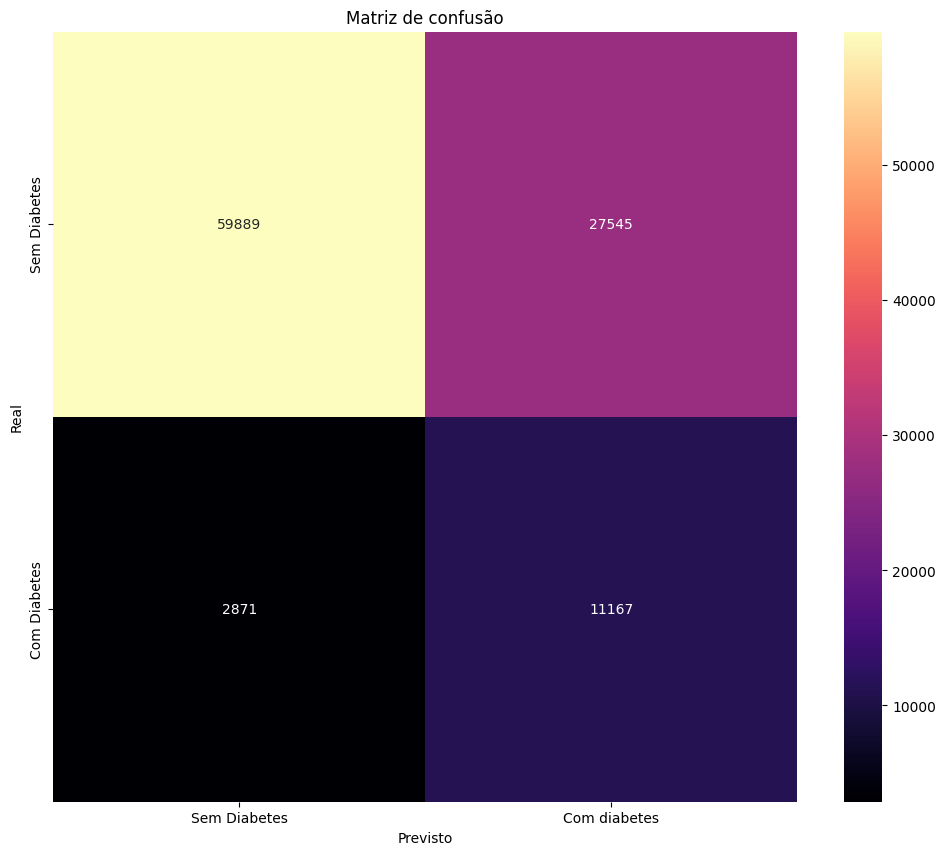

In [37]:
cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cfm, annot=True, cmap='magma', fmt='d', 
            xticklabels=["Sem Diabetes", "Com diabetes"], yticklabels=["Sem Diabetes", "Com Diabetes"])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de confusão')

#### Precisão e Recall

In [38]:
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred) * 100))

Precisão: 28.85%
Recall: 79.55%


#### Comparativo entre os valores obtidos de Naive e Randomized Search

In [7]:
import pandas as pd
values_mlp = pd.DataFrame({"Acurácia":["86.39%","70.03%"],
                                     "F1":["32.25%","42.34%"],
                                     "Precisão":["51.62%","28.85%"], 
                                     "Recall":["23.45%","79.55%"]})
values_mlp.index =  ["Naive", "Randomized Search CV"]
values_mlp

Acurácia      F1 Precisão  Recall
Naive                  86.39%  32.25%   51.62%  23.45%
Randomized Search CV   70.03%  42.34%   28.85%  79.55%

#### Observações
	Da mesma forma que nas abordagens anteriores, foi feita uma otimização de hiperparâmetros com o objetivo de se reduzir o overfitting do conjunto de dados e melhorar a capacidade de identificação dos pacientes diabéticos/pré-diabéticos.
    
	A baixa diferença dos valores de F1 score e Recall, quando comparados com os provenientes da Decision Tree e Random Forest, provavelmente se dá pela influência das features GenHlth e HighBp ou pela escolha dos valores no otimizador de hiperparâmetros.

    A queda de acurácia possivelmente se deu pelo desbalanço presente nos dados ou a escolha dos parâmetros para o otimizador, que simplesmente prejudicaram a acurácia, como discutido anteriormente no segmento sobre Random Forest.
    
	Outro fator, também discutido na execução das Random Forests, se dá pelo tamanho do espaço de busca - maior que dos de uma Decision Tree e Random Forest - do Multilayer Perceptron. Devido a esta técnica ser mais eficiente em datasets com relações complexas entre as features, o que não se mostra o caso, pois apenas duas features - GenHlth e HighBp - têm influência considerável, este modelo apresentaria pouca melhora de resultados em relação a uma Decision Tree. Logo, trata-se de um conjunto de dados mais facilmente representados em uma Decision Tree.

# 5) Conclusão

## 5.1) Tabelas comparativas de todas as abordagens

In [3]:
values_decision_tree = pd.DataFrame({"Acurácia":["86.37%","88.35%"],
                                     "F1":["28.33%","41.42%"],
                                     "Precisão":["51.85%","28.04%"], 
                                     "Recall":["19.49%","79.23%"]})
values_decision_tree.index =  ["Naive", "Grid Search CV"]
values_random_forest = pd.DataFrame({"Acurácia":["86.05%","68.98%"],
                                     "F1":["25.47%","42.02%"],
                                     "Precisão":["48.69%","28.34%"], 
                                     "Recall":["17.24%","81.27%"]})
values_random_forest.index =  ["Naive", "Bayes Optimization"]

#### Árvore de Decisão

In [4]:
values_decision_tree

Acurácia      F1 Precisão  Recall
Naive            86.37%  28.33%   51.85%  19.49%
Grid Search CV   88.35%  41.42%   28.04%  79.23%

#### Random Forest

In [15]:
values_random_forest

Acurácia      F1 Precisão  Recall
Naive                86.05%  25.47%   48.69%  17.24%
Bayes Optimization   68.98%  42.02%   28.34%  81.27%

#### Rede Neural Mulitlayer Perceptron

In [8]:
values_mlp

Acurácia      F1 Precisão  Recall
Naive                  86.39%  32.25%   51.62%  23.45%
Randomized Search CV   70.03%  42.34%   28.85%  79.55%

## 5.2) Discussão
     Devido à natureza dos dados e as informações obtidas dos três métodos, pela maior facilidade manuseio e interpretação dos resultados obitdos, o melhor modelo para se colocar em produção para este dataset seria o de Decision Tree.